# Aroon Oscillator

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:aroon_oscillator

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [4]:
n = 25 
high_max = lambda xs: np.argmax(xs[::-1])
low_min = lambda xs: np.argmin(xs[::-1])

df['Days since last High'] = df['High'].rolling(center=False,min_periods=0,window=n).apply(func=high_max).astype(int)
    
df['Days since last Low'] = df['Low'].rolling(center=False,min_periods=0,window=n).apply(func=low_min).astype(int)
    
df['Aroon_Up'] = ((25-df['Days since last High'])/25) * 100
df['Aroon_Down'] = ((25-df['Days since last Low'])/25) * 100

df['Aroon_Oscillator'] = df['Aroon_Up'] - df['Aroon_Down']

In [5]:
df = df.drop(['Days since last High','Days since last Low', 'Aroon_Up', 'Aroon_Down'],axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

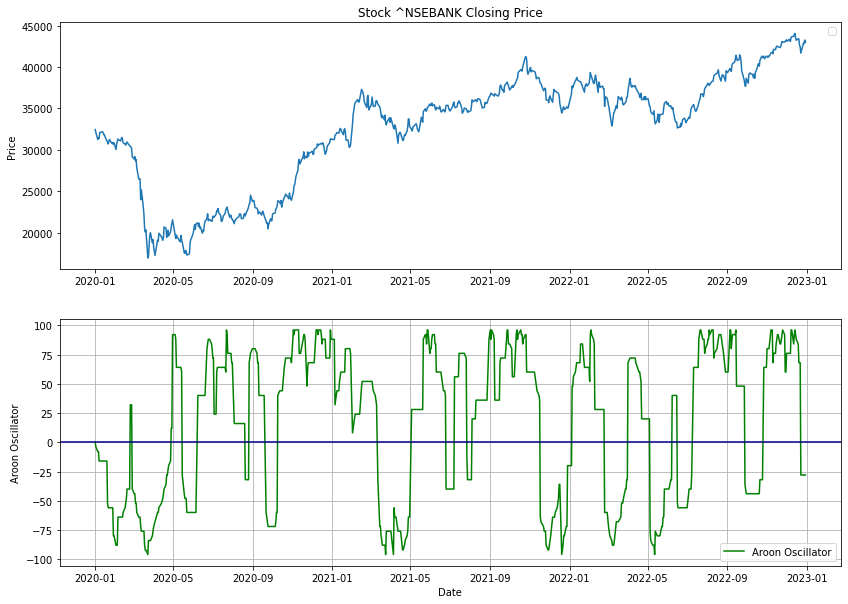

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Aroon_Oscillator'], label='Aroon Oscillator', color='g')
ax2.axhline(y=0, color='darkblue')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Aroon Oscillator')
ax2.set_xlabel('Date')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

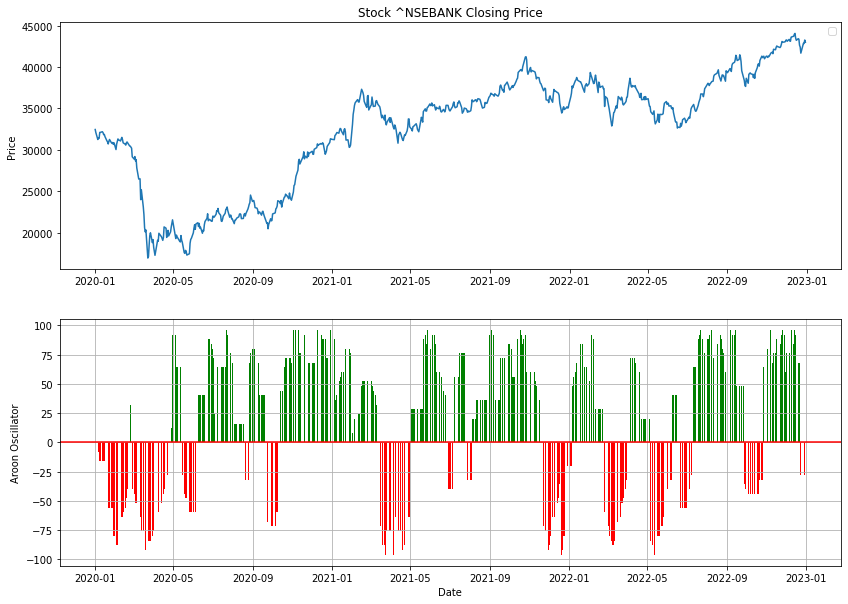

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

df['Positive'] = df['Aroon_Oscillator'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['Aroon_Oscillator'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Aroon Oscillator')
ax2.set_xlabel('Date')

## Candlestick with Aroon Oscillator

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Aroon_Oscillator,Positive,VolumePositive
0,18262.770833,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,0.0,False,True
1,18263.770833,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,-4.0,False,False
2,18266.770833,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,-8.0,False,False
3,18267.770833,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,-8.0,False,False
4,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,-16.0,False,True


Text(0.5, 0, 'Date')

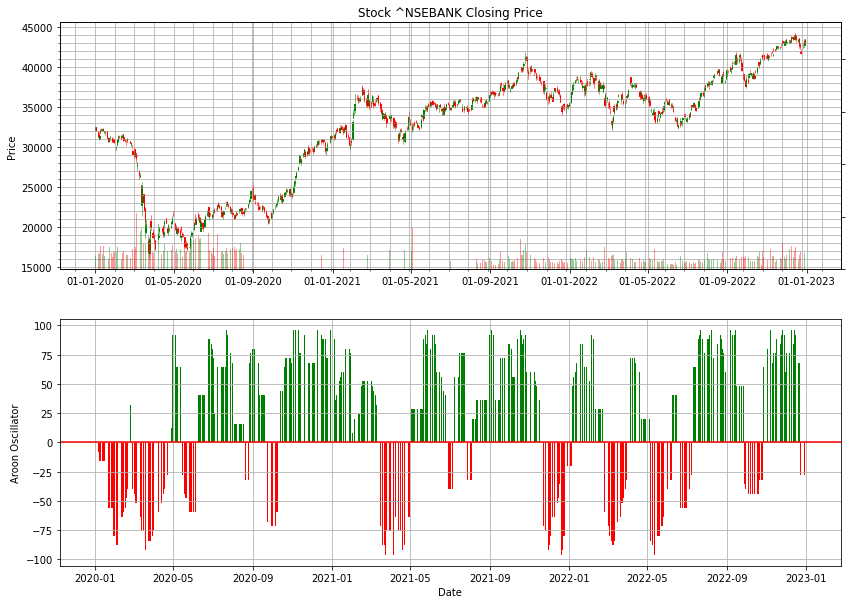

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

df['Positive'] = df['Aroon_Oscillator'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['Aroon_Oscillator'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Aroon Oscillator')
ax2.set_xlabel('Date')